# EECS 504 Problem Set 4

__Please provide the following information__
(e.g. Jason Corso, jjcorso):

[Your first name] [Your last name], [Your UMich uniqname]

__Important__: after you download the .ipynb file, please name it as EECS504_PS4_\<your_uniquename\>_\<your_umid\>.ipynb before you submit it to canvas. Example: EECS504_PS4_adam_01101100.ipynb.

# Introduction

We'll provide you with starter code, like this, in a Jupyter notebook for most problem sets. Please fill in the code to complete the assignment, and submit your notebook to Canvas as a .ipynb file. You can, of course, initially write your code offline in an editor like Emacs or Vim -- we'd just like the final output to be in a notebook format to make grading more consistent.

Please note that *we won't run your code*. The notebook you submit should already contain all of the results we ask for. In other words, outputs should be computed *before you submit*.  Also, please do not include long, unnecessary outputs (a few print statements and visualizations are fine, but pages of debugging messages make grading difficult).

You will have to make three submissions:

1) Submit the written questions in a pdf to gradescope (there will be an entry for the written part).

2) Turn the notebook into a pdf file and submit it to gradescope (there will be an entry for the coding part). DO NOT USE YOUR BROWSER'S PRINT FUNCTIONALITY DIRECTLY ON THE NOTEBOOK TO GET THE PDF. You will have to download the ipynb notebook, run the command: ipython nbconvert --to html EECS_504_PS4.ipynb  on your computer, open that html file in a browser and then print as PDF. Make sure that all the images and coding blocks are visible in your pdf.

3) Submit the .ipynb file directly to canvas.

# Starting

Run the following code to import the modules and download all the files you'll need.. After your finish the assignment, remember to run all cells and save the note book to your local machine as a .ipynb file for Canvas submission.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
from torchvision.datasets import CIFAR10
import math
from keras.datasets import mnist
download = not os.path.isdir('cifar-10-batches-py')
dset_train = CIFAR10(root='.', download=download)

Extracting ./cifar-10-python.tar.gz to .



# Problem 2 Multi-layer perceptron
In this problem you will develop a two Layer neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

We train the network with a softmax loss function on the weight matrices. The network uses a ReLU nonlinearity after the first fully connected layer. In other words, the network has the following architecture:

input - fully connected layer - ReLU - fully connected layer - softmax

The outputs of the second fully-connected layer are the scores for each class.

You cannot use any deep learning libraries such as PyTorch in this part.

# 2.1 Layers
In this problem, implement fully connected layer, relu and softmax. Filling in all TODOs in skeleton codes will be sufficient.

In [13]:
def fc_forward(x, w, b):
    """
    Computes the forward pass for a fully-connected layer.
    
    The input x has shape (N, Din) and contains a minibatch of N
    examples, where each example x[i] has shape (Din,).
    
    Inputs:
    - x: A numpy array containing input data, of shape (N, Din)
    - w: A numpy array of weights, of shape (Din, Dout)
    - b: A numpy array of biases, of shape (Dout,)
    
    Returns a tuple of:
    - out: output, of shape (N, Dout)
    - cache: (x, w, b)
    """
    ###########################################################################
    # TODO: Implement the forward pass. Store the result in out.              #
    ###########################################################################
    
    out = np.matmul(x, w) + b   # numpy array broadcasts the bias

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, w, b)
    
    return out, cache


def fc_backward(dout, cache):
    """
    Computes the backward pass for a fully_connected layer.
    
    Inputs:
    - dout: Upstream derivative, of shape (N, Dout)
    - cache: returned by your forward function. Tuple of:
      - x: Input data, of shape (N, Din)
      - w: Weights, of shape (Din, Dout)
      - b: Biases, of shape (Dout,)
      
    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, Din)
    - dw: Gradient with respect to w, of shape (Din, Dout)
    - db: Gradient with respect to b, of shape (Dout,)
    """
    x, w, b = cache
    ###########################################################################
    # TODO: Implement the affine backward pass.                               #
    ###########################################################################   
    
    dx = np.matmul(dout, np.transpose(w))
    dw = np.matmul(np.transpose(x), dout)
    db = np.matmul(np.transpose(dout), np.ones((x.shape[0], )))
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx, dw, db

def relu_forward(x):
    """
    Computes the forward pass for a layer of rectified linear units (ReLUs).

    Input:
    - x: Inputs, of any shape

    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """
    
    ###########################################################################
    # TODO: Implement the ReLU forward pass.                                  #
    ###########################################################################
    
    out = np.where(x >= 0, x, 0)    
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = x
    return out, cache


def relu_backward(dout, cache):
    """
    Computes the backward pass for a layer of rectified linear units (ReLUs).

    Input:
    - dout: Upstream derivatives, of any shape
    - cache: returned by your forward function. Input x, of same shape as dout

    Returns:
    - dx: Gradient with respect to x
    """
     

    ###########################################################################
    # TODO: Implement the ReLU backward pass.                                 #
    ###########################################################################

    dx = np.where(cache >= 0, dout, 0)

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx


def softmax_loss(x, y):
    """
    Computes the loss and gradient for softmax classification.
    The loss that we are using is the cross entropy loss. 
    
    Inputs:
    - x: Input data, of shape (N, C) where x[i, j] is the score for the jth
      class for the ith input.
    - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
      0 <= y[i] < C

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
    ###########################################################################
    # TODO: Implement softmax loss                                            #
    ###########################################################################
    
    loss = 0
    N = x.shape[0]
    C = x.shape[1]

    # subtract the max score in each example  
    x -= np.tile(x.max(axis=1), (C,1)).transpose()
    
    # calculate the loss and gradients
    loss = -np.log(np.exp(x[range(N),y]) / np.sum(np.exp(x), axis=1))
    loss = loss.sum() / N

    dx = np.exp(x) / np.tile(np.sum(np.exp(x), axis=1), (C,1)).transpose()
    dx[range(N),y] -= 1
    dx = dx / N

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return loss, dx

# 2.2 Softmax Classifier

In this problem, implement softmax classifier.

In [3]:
class SoftmaxClassifier(object):
    """
    A fully-connected neural network with
    softmax loss that uses a modular layer design. We assume an input dimension
    of D, a hidden dimension of H, and perform classification over C classes.

    The architecture should be fc - relu - fc - softmax with one hidden layer

    The learnable parameters of the model are stored in the dictionary
    self.params that maps parameter names to numpy arrays.
    """

    def __init__(self, input_dim=3072, hidden_dim=300, num_classes=10,
                 weight_scale=1e-3):
        """
        Initialize a new network.

        Inputs:
        - input_dim: An integer giving the size of the input
        - hidden_dim: An integer giving the size of the hidden layer, None
          if there's no hidden layer.
        - num_classes: An integer giving the number of classes to classify
        - weight_scale: Scalar giving the standard deviation for random
          initialization of the weights.
        """
        self.params = {}
        self.hidden_dim = hidden_dim
        ############################################################################
        # TODO: Initialize the weights and biases of the two-layer net. Weights    #
        # should be initialized from a Gaussian centered at 0.0 with               #
        # standard deviation equal to weight_scale, and biases should be           #
        # initialized to zero. All weights and biases should be stored in the      #
        # dictionary self.params, with fc weights and biases using the keys        #
        # 'W' and 'b', i.e., W1, b1 for the weights and bias in the first linear   #
        # layer, W2, b2 for the weights and bias in the second linear layer.       #
        # Hint: np.random.normal
        ############################################################################

        self.params = {
            "W1": np.random.normal(0, weight_scale, (input_dim, hidden_dim)),
            "b1": np.zeros((hidden_dim,)),
            "W2": np.random.normal(0, weight_scale, (hidden_dim, num_classes)),
            "b2": np.zeros((num_classes,))
        }

        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################


    def forwards_backwards(self, X, y=None):
        """
        Compute loss and gradient for a minibatch of data.

        Inputs:
        - X: Array of input data of shape (N, Din)
        - y: Array of labels, of shape (N,). y[i] gives the label for X[i].

        Returns:
        If y is None, then run a test-time forward pass of the model and return:
        - scores: Array of shape (N, C) giving classification scores, where
          scores[i, c] is the classification score for X[i] and class c.

        If y is not None, then run a training-time forward and backward pass. And
        return a tuple of:
        - loss: Scalar value giving the loss
        - grads: Dictionary with the same keys as self.params, mapping parameter
          names to gradients of the loss with respect to those parameters.
        """

        ############################################################################
        # TODO: Implement the forward pass for the two-layer net, computing the    #
        # class scores for X and storing them in the scores variable.              #
        ############################################################################

        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']

        # fc
        hidden, cache_hidden = fc_forward(X, W1, b1)
        # relu        
        hidden_relu, cache_relu = relu_forward(hidden)
        # fc
        scores, cache_scores = fc_forward(hidden_relu, W2, b2)

        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################

        # If y is None then we are in test mode so just return scores
        if y is None:
            return scores

        loss, grads = 0, {}
        ############################################################################
        # TODO: Implement the backward pass for the two-layer net. Store the loss  #
        # in the loss variable and gradients in the grads dictionary. Compute data #
        # loss using softmax, and make sure that grads[k] holds the gradients for  #
        # self.params[k].                                                          # 
        ############################################################################

        # loss
        loss, dx = softmax_loss(scores, y)
        # fc_back        
        dx_scores, dw_scores, db_scores = fc_backward(dx, cache_scores)
        # relu_back
        dx_relu = relu_backward(dx_scores, cache_relu)
        # fc_back
        _, dw_hidden, db_hidden = fc_backward(dx_relu, cache_hidden)       
        
        grads = {
            "W1": dw_hidden,
            "b1": db_hidden,
            "W2": dw_scores,
            "b2": db_scores
        }

        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################
        return loss, grads

  

# 2.3 Training

In this problem, you will train the model.

In [4]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding="latin1")
    return dict

def load_cifar10():
    data = {}
    meta = unpickle("cifar-10-batches-py/batches.meta")
    batch1 = unpickle("cifar-10-batches-py/data_batch_1")
    batch2 = unpickle("cifar-10-batches-py/data_batch_2")
    batch3 = unpickle("cifar-10-batches-py/data_batch_3")
    batch4 = unpickle("cifar-10-batches-py/data_batch_4")
    batch5 = unpickle("cifar-10-batches-py/data_batch_5")
    test_batch = unpickle("cifar-10-batches-py/test_batch")
    X_train = np.vstack((batch1['data'], batch2['data'], batch3['data'],\
                         batch4['data'], batch5['data']))
    Y_train = np.array(batch1['labels'] + batch2['labels'] + batch3['labels'] + 
                       batch4['labels'] + batch5['labels'])
    X_test = test_batch['data']
    Y_test = test_batch['labels']
    
    #Preprocess images here                                     
    X_train = (X_train-np.mean(X_train,axis=1,keepdims=True))/np.std(X_train,axis=1,keepdims=True)
    X_test = (X_test-np.mean(X_test,axis=1,keepdims=True))/np.std(X_test,axis=1,keepdims=True)

    data['X_train'] = X_train[:40000]
    data['y_train'] = Y_train[:40000]
    data['X_val'] = X_train[40000:]
    data['y_val'] = Y_train[40000:]
    data['X_test'] = X_test
    data['y_test'] = Y_test
    return data

def test_network(model, X, y, num_samples=None, batch_size=100):
    """
    Check accuracy of the model on the provided data.

    Inputs:
    - model: Image classifier
    - X: Array of data, of shape (N, d_1, ..., d_k)
    - y: Array of labels, of shape (N,)
    - num_samples: If not None, subsample the data and only test the model
      on num_samples datapoints.
    - batch_size: Split X and y into batches of this size to avoid using
      too much memory.

    Returns:
    - acc: Scalar giving the fraction of instances that were correctly
      classified by the model.
    """

    # Subsample the data
    N = X.shape[0]
    if num_samples is not None and N > num_samples:
        mask = np.random.choice(N, num_samples)
        N = num_samples
        X = X[mask]
        y = y[mask]

    # Compute predictions in batches
    num_batches = N // batch_size
    if N % batch_size != 0:
        num_batches += 1
    y_pred = []
    for i in range(num_batches):
        start = i * batch_size
        end = (i + 1) * batch_size
        scores = model.forwards_backwards(X[start:end])
        y_pred.append(np.argmax(scores, axis=1))
    y_pred = np.hstack(y_pred)
    acc = np.mean(y_pred == y)

    return acc


def train_network(model, data, **kwargs):
    """
     Required arguments:
    - model: Image classifier
    - data: A dictionary of training and validation data containing:
      'X_train': Array, shape (N_train, d_1, ..., d_k) of training images
      'X_val': Array, shape (N_val, d_1, ..., d_k) of validation images
      'y_train': Array, shape (N_train,) of labels for training images
      'y_val': Array, shape (N_val,) of labels for validation images

    Optional arguments:
    - learning_rate: A scalar for initial learning rate.
    - lr_decay: A scalar for learning rate decay; after each epoch the
      learning rate is multiplied by this value.
    - batch_size: Size of minibatches used to compute loss and gradient
      during training.
    - num_epochs: The number of epochs to run for during training.
    - print_every: Integer; training losses will be printed every
      print_every iterations.
    - verbose: Boolean; if set to false then no output will be printed
      during training.
    - num_train_samples: Number of training samples used to check training
      accuracy; default is 1000; set to None to use entire training set.
    - num_val_samples: Number of validation samples to use to check val
      accuracy; default is None, which uses the entire validation set.
    """
    
    
    learning_rate =  kwargs.pop('learning_rate', 1e-3)
    lr_decay = kwargs.pop('lr_decay', 1.0)
    batch_size = kwargs.pop('batch_size', 100)
    num_epochs = kwargs.pop('num_epochs', 10)
    num_train_samples = kwargs.pop('num_train_samples', 1000)
    num_val_samples = kwargs.pop('num_val_samples', None)
    print_every = kwargs.pop('print_every', 10)   
    verbose = kwargs.pop('verbose', True)
    
    epoch = 0
    best_val_acc = 0
    best_params = {}
    loss_history = []
    train_acc_history = []
    val_acc_history = []
    
    
    num_train = data['X_train'].shape[0]
    iterations_per_epoch = max(num_train // batch_size, 1)
    num_iterations = num_epochs * iterations_per_epoch
    

    
    for t in range(num_iterations):
        # Make a minibatch of training data
        batch_mask = np.random.choice(num_train, batch_size)
        X_batch = data['X_train'][batch_mask]
        y_batch = data['y_train'][batch_mask]
        
        # Compute loss and gradient
        loss, grads = model.forwards_backwards(X_batch, y_batch)
        loss_history.append(loss)

        # Perform a parameter update
        for p, w in model.params.items():
            model.params[p] = w - grads[p]*learning_rate
          
        # Print training loss
        if verbose and t % print_every == 0:
            print('(Iteration %d / %d) loss: %f' % (
                   t + 1, num_iterations, loss_history[-1]))
         
        # At the end of every epoch, increment the epoch counter and decay
        # the learning rate.
        epoch_end = (t + 1) % iterations_per_epoch == 0
        if epoch_end:
            epoch += 1
            learning_rate *= lr_decay
        
        # Check train and val accuracy on the first iteration, the last
        # iteration, and at the end of each epoch.
        first_it = (t == 0)
        last_it = (t == num_iterations - 1)
        if first_it or last_it or epoch_end:
            train_acc = test_network(model, data['X_train'], data['y_train'],
                num_samples= num_train_samples)
            val_acc = test_network(model, data['X_val'], data['y_val'],
                num_samples=num_val_samples)
            train_acc_history.append(train_acc)
            val_acc_history.append(val_acc)

            if verbose:
                print('(Epoch %d / %d) train acc: %f; val_acc: %f' % (
                       epoch, num_epochs, train_acc, val_acc))

            # Keep track of the best model
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_params = {}
                for k, v in model.params.items():
                    best_params[k] = v.copy()
        
    model.params = best_params
        
    return model, train_acc_history, val_acc_history
        

# load data
data = load_cifar10() 
train_data = { k: data[k] for k in ['X_train', 'y_train', 
                                    'X_val', 'y_val']}


# initialize model
model = SoftmaxClassifier(hidden_dim =250, weight_scale=1e-2)

# start training    
model, train_acc_history, val_acc_history = train_network(
    model, train_data, learning_rate = 0.1,
    lr_decay=.92, num_epochs=10, 
    batch_size=150, print_every=1000)



(Iteration 1 / 2660) loss: 2.308478
(Epoch 0 / 10) train acc: 0.144000; val_acc: 0.140800
(Epoch 1 / 10) train acc: 0.469000; val_acc: 0.437200
(Epoch 2 / 10) train acc: 0.529000; val_acc: 0.473800
(Epoch 3 / 10) train acc: 0.574000; val_acc: 0.456900
(Iteration 1001 / 2660) loss: 1.432295
(Epoch 4 / 10) train acc: 0.594000; val_acc: 0.494000
(Epoch 5 / 10) train acc: 0.594000; val_acc: 0.497900
(Epoch 6 / 10) train acc: 0.632000; val_acc: 0.497300
(Epoch 7 / 10) train acc: 0.684000; val_acc: 0.503900
(Iteration 2001 / 2660) loss: 0.838271
(Epoch 8 / 10) train acc: 0.712000; val_acc: 0.502000
(Epoch 9 / 10) train acc: 0.714000; val_acc: 0.514200
(Epoch 10 / 10) train acc: 0.763000; val_acc: 0.512700


# Report Accuracy

Run the given code and report the accuracy on test set.

In [5]:
# report test accuracy
acc = test_network(model, data['X_test'], data['y_test'])
print("Test accuracy: {}".format(acc))

Test accuracy: 0.5116


# 2.4 Plot

Using the train_acc_history and val_acc_history, plot the train & val accuracy versus epochs on one plot. 

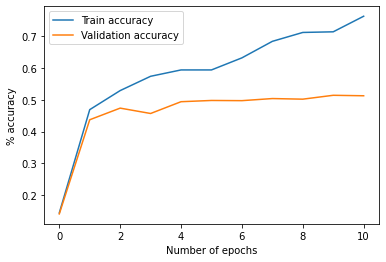

In [6]:
plt.plot(train_acc_history, label = "Train accuracy")
plt.plot(val_acc_history, label = "Validation accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("% accuracy")

plt.legend()
plt.show()

# Problem 3: Convolutional Neural Network
In this problem you will train a network with the following architecture: conv - relu - 2x2 max pool - fc - relu - fc - softmax, and test it out on the MNIST dataset.

The outputs of the last fully connected layer are the scores for each class.

You cannot use any deep learning libraries such as PyTorch in this part.

GREAT RESOURCE: https://cs231n.github.io/convolutional-networks/

# Layers
In this part, we implement the layers you need for your network.

In [20]:
def conv_forward(x, w):
    """
    The input consists of N data points, each with C channels, height H and
    width W. We filter each input with F different filters, where each filter
    spans all C channels and has height HH and width WW. 
    Input:
    - x: Input data of shape (N, C, H, W)
    - w: Filter weights of shape (F, C, HH, WW)
    Returns a tuple of:
    - out: Output data, of shape (N, F, H', W') where H' and W' are given by
      H' = H - HH + 1
      W' = W - WW + 1
    - cache: (x, w)
    """
    out = None
    ###########################################################################
    # TODO: Implement the convolutional forward pass.                         #
    ###########################################################################
    # Extract shapes and constants
    N, C, H, W = x.shape
    F, _, HH, WW = w.shape

    H_out = H - HH + 1
    W_out = W - WW + 1

    out = []

    # Compute 2d convolution of the input data and the weight   
    for input_data in x:
      out_ = np.zeros((F, H_out, W_out))

      # stride the weight over the receptive fields (stride: 1)
      for row in range(H_out):
        for col in range(W_out):
          # multiply the input data (C, H', W') and the weight (F, C, H', W')
          # and accumulate over (C, H', W') axes
          out_[:, row, col] = (input_data[:, row:row+HH, \
                                          col:col+HH] * w).sum(axis=(1,2,3))   

      out.append(out_)

    out = np.array(out)

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, w)
    return out, cache


def conv_backward(dout, cache):
    """
    Inputs:
    - dout: Upstream derivatives.
    - cache: A tuple of (x, w) as in conv_forward
    Returns a tuple of:
    - dx: Gradient with respect to x
    - dw: Gradient with respect to w
    """
    dx, dw = None, None
    ###########################################################################
    # TODO: Implement the convolutional backward pass.                        #
    ###########################################################################

    x, w = cache
    N, C, H, W = x.shape
    F, _, HH, WW = w.shape

    H_out = H - HH + 1
    W_out = W - WW + 1

    dx = np.zeros_like(x)
    dw = np.zeros_like(w)

    # zero-pad dout for dx convolution
    dout_pad = np.pad(dout, ((0,0),(0,0),(HH-1,HH-1),(WW-1,WW-1)), 'constant')    

    # dx (unused in this architecture): looping over channel (C) dimensions
    for ind_ch in range(C):
      # looping over x-y coordinates
      for row in range(H):
        for col in range(W):
          dx[:, ind_ch, row, col] = (dout_pad[:, :, row:row+HH, col:col+WW] * \
                                     w[:, ind_ch, ::-1, ::-1]).sum()

    # dw: looping over input(C)/output(F) channel dimensions
    for ind_filter in range(F):
      for ind_ch in range(C):
        # looping over x-y coordinates
        for row in range(HH):
          for col in range(WW):         
            dw[ind_filter, ind_ch, row, col] = \
            (dout[:, ind_filter, :, :] * x[:, ind_ch, row:row+H_out, col:col+W_out]).sum() / N

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx, dw
  

def max_pool_forward(x, pool_param):
    """
    A naive implementation of the forward pass for a max-pooling layer.
    Inputs:
    - x: Input data, of shape (N, C, H, W)
    - pool_param: dictionary with the following keys:
      - 'pool_height': The height of each pooling region
      - 'pool_width': The width of each pooling region
      - 'stride': The distance between adjacent pooling regions
    No padding is necessary here. Output size is given by 
    Returns a tuple of:
    - out: Output data, of shape (N, C, H', W') where H' and W' are given by
      H' = 1 + (H - pool_height) / stride
      W' = 1 + (W - pool_width) / stride
    - cache: (x, pool_param)
    """
    out = None
    ###########################################################################
    # TODO: Implement the max-pooling forward pass                            #
    ###########################################################################
    N, C, H, W = x.shape

    pool_height = pool_param["pool_height"]
    pool_width = pool_param["pool_width"]
    stride = pool_param["stride"]

    # As the problem states, assume that the pooling parameters are given 
    # so as to satisfy the right fit to the input data without the padding

    H_out = 1 + (H - pool_height) // stride   # '/' is okay too for the given params
    W_out = 1 + (W - pool_width) // stride

    out = np.zeros((N, C, H_out, W_out))

    for row in range(H_out):
      for col in range(W_out):
        out[:, :, row, col] = x[:, :, row*stride:row*stride+pool_height, \
                                col*stride:col*stride+pool_width].max(axis=(2,3))

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, pool_param)
    return out, cache


def max_pool_backward(dout, cache):
    """
    A naive implementation of the backward pass for a max-pooling layer.
    Inputs:
    - dout: Upstream derivatives
    - cache: A tuple of (x, pool_param) as in the forward pass.
    Returns:
    - dx: Gradient with respect to x
    """
    dx = None
    ###########################################################################
    # TODO: Implement the max-pooling backward pass                           #
    ###########################################################################
    x, pool_param = cache

    N, C, H, W = x.shape

    pool_height = pool_param["pool_height"]
    pool_width = pool_param["pool_width"]
    stride = pool_param["stride"]

    H_out = 1 + (H - pool_height) // stride   # '/' is okay too for the given params
    W_out = 1 + (W - pool_width) // stride

    dx = np.zeros((N, C, H, W))

    # looping over N and C
    for ind_ex in range(N):
      for ind_ch in range(C):
        # looping over x-y coordinates
        for row in range(H_out):
          for col in range(W_out):
            x_pool = x[ind_ex, ind_ch, row*stride:row*stride+pool_height, \
                       col*stride:col*stride+pool_width]
            
            # retrieve the coordinate with the maximum value within the subwindow (2x2)
            row_max, col_max = np.unravel_index(np.argmax(x_pool), x_pool.shape)
            dx[ind_ex, ind_ch, row_max, col_max] = dout[ind_ex, ind_ch, row_max, col_max]      

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx



# 3.1 Classifier with convolutional layer

In this problem, implement ConvNet.

In [21]:
class ConvNet(object):
  """
  A convolutional network with the following architecture:
  
  conv - relu - 2x2 max pool - fc - relu - fc - softmax
  You may also consider adding dropout layer or batch normalization layer. 
  
  The network operates on minibatches of data that have shape (N, C, H, W)
  consisting of N images, each with height H and width W and with C input
  channels.
  """
  
  def __init__(self, input_dim=(1, 28, 28), num_filters=32, filter_size=7,
               hidden_dim=100, num_classes=10, weight_scale=1e-3, dtype=np.float32):
    """
    Initialize a new network.
    
    Inputs:
    - input_dim: Tuple (C, H, W) giving size of input data
    - num_filters: Number of filters to use in the convolutional layer
    - filter_size: Size of filters to use in the convolutional layer
    - hidden_dim: Number of units to use in the fully-connected hidden layer
    - num_classes: Number of scores to produce from the final affine layer.
    - weight_scale: Scalar giving standard deviation for random initialization
      of weights.
    - dtype: numpy datatype to use for computation.
    """
    self.params = {}
    self.dtype = dtype
    
    ############################################################################
    # TODO: Initialize weights and biases for the three-layer convolutional    #
    # network. Weights should be initialized from a Gaussian with standard     #
    # deviation equal to weight_scale; biases should be initialized to zero.   #
    # All weights and biases should be stored in the dictionary self.params.   #
    # Store weights for the convolutional layer using the keys 'W1' (here      #
    # we do not consider the bias term in the convolutional layer);            #
    # use keys 'W2' and 'b2' for the weights and biases of the                 #
    # hidden fully-connected layer, and keys 'W3' and 'b3' for the weights     #
    # and biases of the output affine layer.                                   #
    ############################################################################

    H_convout = input_dim[1] - filter_size + 1
    W_convout = input_dim[2] - filter_size + 1

    self.params = {
      "W1": np.random.normal(0, weight_scale, (num_filters, input_dim[0], filter_size, filter_size)),
      "W2": np.random.normal(0, weight_scale, (num_filters*H_convout*W_convout//4, hidden_dim)),
      "b2": np.zeros((hidden_dim,)),
      "W3": np.random.normal(0, weight_scale, (hidden_dim, num_classes)),
      "b3": np.zeros((num_classes,))
    }

    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################

    for k, v in self.params.items():
      self.params[k] = v.astype(dtype)
     
 
  def forwards_backwards(self, X, y=None):
    """
    Evaluate loss and gradient for the three-layer convolutional network.
    
    Input / output: Same API as TwoLayerNet in fc_net.py.
    """

    W1 = self.params['W1']
    W2, b2 = self.params['W2'], self.params['b2']
    W3, b3 = self.params['W3'], self.params['b3']
    
    # pass pool_param to the forward pass for the max-pooling layer
    pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

    scores = None
    ############################################################################
    # TODO: Implement the forward pass for the three-layer convolutional net,  #
    # computing the class scores for X and storing them in the scores          #
    # variable.                                                                #
    ############################################################################

    N = X.shape[0]

    # conv
    convout, cache_convout = conv_forward(X, W1)
    # relu
    relu_convout, cache_relu_convout = relu_forward(convout)
    # 2x2 max pool
    poolout, cache_poolout = max_pool_forward(relu_convout, pool_param)
    
    # flatten poolout to feed the fully-connected layer
    poolout_flat = poolout.reshape((N,-1))
    
    # fc
    hidden, cache_hidden = fc_forward(poolout_flat, W2, b2)
    # relu
    relu_hidden, cache_relu_hidden = relu_forward(hidden)
    # fc
    scores, cache_scores = fc_forward(relu_hidden, W3, b3)

    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    
    if y is None:
      return scores
    
    loss, grads = 0, {}
    ############################################################################
    # TODO: Implement the backward pass for the three-layer convolutional net, #
    # storing the loss and gradients in the loss and grads variables. Compute  #
    # data loss using softmax, and make sure that grads[k] holds the gradients #
    # for self.params[k].                                                      #
    ############################################################################

    # softmax loss
    loss, dx = softmax_loss(scores, y)
    # fc_score_back
    dx_scores, dw_scores, db_scores = fc_backward(dx, cache_scores)
    # relu_hidden_back    
    dx_relu_hidden = relu_backward(dx_scores, cache_relu_hidden)
    # fc_hidden_back
    dx_hidden, dw_hidden, db_hidden = fc_backward(dx_relu_hidden, cache_hidden)
    
    # reshape dx_hidden to feed max_pool_backward
    dx_hidden = dx_hidden.reshape(poolout.shape)

    # pool_back
    dx_poolout = max_pool_backward(dx_hidden, cache_poolout)
    # relu_convout_back    
    dx_relu_convout = relu_backward(dx_poolout, cache_relu_convout)

    # conv_back
    _, dw_conv = conv_backward(dx_relu_convout, cache_convout)

    grads = {
        "W1": dw_conv,
        "W2": dw_hidden,
        "b2": db_hidden,
        "W3": dw_scores,
        "b3": db_scores
    }

    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    
    return loss, grads

# 3.2 Training

In this problem, you need to train the model.

In [22]:
def test_network(model, X, y, num_samples=None, batch_size=100):
    """
    Check accuracy of the model on the provided data.

    Inputs:
    - model: Image classifier
    - X: Array of data, of shape (N, d_1, ..., d_k)
    - y: Array of labels, of shape (N,)
    - num_samples: If not None, subsample the data and only test the model
      on num_samples datapoints.
    - batch_size: Split X and y into batches of this size to avoid using
      too much memory.

    Returns:
    - acc: Scalar giving the fraction of instances that were correctly
      classified by the model.
    """

    # Subsample the data
    N = X.shape[0]
    if num_samples is not None and N > num_samples:
        mask = np.random.choice(N, num_samples)
        N = num_samples
        X = X[mask]
        y = y[mask]

    # Compute predictions in batches
    num_batches = N // batch_size
    if N % batch_size != 0:
        num_batches += 1
    y_pred = []
    for i in range(num_batches):
        start = i * batch_size
        end = (i + 1) * batch_size
        scores = model.forwards_backwards(X[start:end])
        y_pred.append(np.argmax(scores, axis=1))
    y_pred = np.hstack(y_pred)
    acc = np.mean(y_pred == y)

    return acc


def train_network(model, data, **kwargs):
    """
     Required arguments:
    - model: Image classifier
    - data: A dictionary of training and validation data containing:
      'X_train': Array, shape (N_train, d_1, ..., d_k) of training images
      'X_val': Array, shape (N_val, d_1, ..., d_k) of validation images
      'y_train': Array, shape (N_train,) of labels for training images
      'y_val': Array, shape (N_val,) of labels for validation images

    Optional arguments:
    - learning_rate: A scalar for initial learning rate.
    - lr_decay: A scalar for learning rate decay; after each epoch the
      learning rate is multiplied by this value.
    - batch_size: Size of minibatches used to compute loss and gradient
      during training.
    - num_epochs: The number of epochs to run for during training.
    - print_every: Integer; training losses will be printed every
      print_every iterations.
    - verbose: Boolean; if set to false then no output will be printed
      during training.
    - num_train_samples: Number of training samples used to check training
      accuracy; default is 1000; set to None to use entire training set.
    - num_val_samples: Number of validation samples to use to check val
      accuracy; default is None, which uses the entire validation set.
    """
    
    
    learning_rate =  kwargs.pop('learning_rate', 1e-3)
    lr_decay = kwargs.pop('lr_decay', 1.0)
    batch_size = kwargs.pop('batch_size', 100)
    num_epochs = kwargs.pop('num_epochs', 10)
    num_train_samples = kwargs.pop('num_train_samples', 200)
    num_val_samples = kwargs.pop('num_val_samples', 200)
    print_every = kwargs.pop('print_every', 10)   
    verbose = kwargs.pop('verbose', True)
    
    epoch = 0
    best_val_acc = 0
    best_params = {}
    loss_history = []
    train_acc_history = []
    val_acc_history = []
    
    
    num_train = data['X_train'].shape[0]
    iterations_per_epoch = max(num_train // batch_size, 1)
    num_iterations = num_epochs * iterations_per_epoch
    num_iterations = 60

    
    for t in range(num_iterations):
        # Make a minibatch of training data
        batch_mask = np.random.choice(num_train, batch_size)
        X_batch = data['X_train'][batch_mask]
        y_batch = data['y_train'][batch_mask]
        # Compute loss and gradient
        loss, grads = model.forwards_backwards(X_batch, y_batch)
        loss_history.append(loss)

        # Perform a parameter update
        for p, w in model.params.items():
            model.params[p] = w - grads[p]*learning_rate
          
        # Print training loss
        if verbose and t % print_every == 0:
            print('(Iteration %d / %d) loss: %f' % (
                   t + 1, num_iterations, loss_history[-1]))
         
        # At the end of every epoch, increment the epoch counter and decay
        # the learning rate.
        epoch_end = (t + 1) % iterations_per_epoch == 0
        if epoch_end:
            epoch += 1
            learning_rate *= lr_decay
        
        
        # Check train and val accuracy on the first iteration, the last
        # iteration, and at the end of each epoch.
        first_it = (t == 0)
        last_it = (t == num_iterations - 1)
        if first_it or last_it or epoch_end:
            train_acc = test_network(model, data['X_train'], data['y_train'],
                num_samples= num_train_samples)
            val_acc = test_network(model, data['X_val'], data['y_val'],
                num_samples=num_val_samples)
            train_acc_history.append(train_acc)
            val_acc_history.append(val_acc)
           

            if verbose:
                print('(Epoch %d / %d) train acc: %f; val_acc: %f' % (
                       epoch, num_epochs, train_acc, val_acc))

            # Keep track of the best model
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_params = {}
                for k, v in model.params.items():
                    best_params[k] = v.copy()
   
    model.params = best_params
        
    return model, train_acc_history, val_acc_history
        

# load data
# data = load_cifar10() 
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_data = { 'X_train':x_train[:,None,:,:], 'X_val': x_test[:,None,:,:], 'y_train': y_train, 'y_val': y_test}



# initialize model
model = ConvNet(hidden_dim =250, weight_scale=1e-2)

# start training    
model, train_acc_history, val_acc_history = train_network(
    model, train_data, learning_rate = 0.001,
    lr_decay=.95, num_epochs=1, 
    batch_size=32, print_every=1)




(Iteration 1 / 60) loss: 2.259490
(Epoch 0 / 1) train acc: 0.155000; val_acc: 0.140000
(Iteration 2 / 60) loss: 2.346610
(Iteration 3 / 60) loss: 2.454739
(Iteration 4 / 60) loss: 2.407785
(Iteration 5 / 60) loss: 2.265858
(Iteration 6 / 60) loss: 2.167770
(Iteration 7 / 60) loss: 2.123907
(Iteration 8 / 60) loss: 2.198617
(Iteration 9 / 60) loss: 2.171868
(Iteration 10 / 60) loss: 2.074297
(Iteration 11 / 60) loss: 2.112870
(Iteration 12 / 60) loss: 2.032037
(Iteration 13 / 60) loss: 1.977449
(Iteration 14 / 60) loss: 2.144631
(Iteration 15 / 60) loss: 1.982128
(Iteration 16 / 60) loss: 2.040505
(Iteration 17 / 60) loss: 2.019853
(Iteration 18 / 60) loss: 1.987893
(Iteration 19 / 60) loss: 1.887530
(Iteration 20 / 60) loss: 1.750572
(Iteration 21 / 60) loss: 1.977837
(Iteration 22 / 60) loss: 1.804716
(Iteration 23 / 60) loss: 1.805672
(Iteration 24 / 60) loss: 1.835275
(Iteration 25 / 60) loss: 1.823687
(Iteration 26 / 60) loss: 1.824281
(Iteration 27 / 60) loss: 1.653487
(Iteration 